#***Guided Project: Classifying Heart Disease Using Logistic Regression***

we'll be looking at a real-life dataset: the Heart Disease Data Set from the UCI Machine Learning Repository. This dataset comes from the famous Cleveland Clinic Foundation, which recorded information on various patient characteristics, including age and chest pain, to try to classify the presence of heart disease in an individual. This a prime example of how machine learning can help solve problems that have a real impact on people's lives.
For this guided project, we will focus on the binary classification case.

In [28]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.preprocessing import StandardScaler

In [11]:
heart_disease_df = pd.read_csv('/content/drive/MyDrive/heart_disease1.csv')


In [12]:
# Display dataset overview
display(heart_disease_df.head())
print("="*43)
print(" HEART DISEASE DATASET OVERVIEW ")
print("="*43, "\n")
print(heart_disease_df.info(), "\n")
print("="*43)
print(" DATA SUMMARY ")
print("="*43, "\n")
print(heart_disease_df.describe().transpose(), "\n")
print("="*43)
print(" MISSING VALUES ")
print("="*43, "\n")
print(heart_disease_df.isnull().sum(), "\n")

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


 HEART DISEASE DATASET OVERVIEW 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB
None 

 DATA SUMMARY 

            count        mean        std    min    25%    50%    75%    max
U

The dataset consists of 303 patient records, each with 14 features and 1 binary target variable (present) indicating the presence (1) or absence (0) of heart disease. These features show reasonable ranges, although outliers may be present in chol and oldpeak.


###**Dataset Properties**:


*   No missing values reported across the dataset.

*   Unnamed: 0 is just an index column and can be safely dropped.
*   ca and thal are typed as object even though they represent numeric categories — they should be converted to numeric or categorical dtypes.


*   The dataset is balanced enough to perform binary classification, with ~45.9% positive cases.





##*Exploratory Data Analysis (EDA)*

In [8]:
heart = heart.drop('Unnamed: 0', axis=1)

We will check the relationships between the potential predictor variables with the outcome via plots (i.e., histograms). See if stratifying by heart disease shows a meaningful difference in the distribution of the predictors:

In [14]:
# Check unique values in 'ca' and 'thal'
print("Unique values in ca:", heart['ca'].unique())
print("Unique values in thal:", heart['thal'].unique())

Unique values in ca: ['0' '3' '2' '1' '?']
Unique values in thal: ['6' '3' '7' '?']


In [15]:
#Clean 'ca' column
# Convert to numeric, replace '?' with NaN
heart['ca'] = pd.to_numeric(heart['ca'].replace('?', np.nan), errors='coerce')
# Calculate mode and ensure it's an integer
mode_ca = int(heart['ca'].mode()[0]) if not heart['ca'].mode().empty else 0
# Fill NaN with mode and convert to integer
heart['ca'] = heart['ca'].fillna(mode_ca).astype(int)

# Clean 'thal' column (similar process)
heart['thal'] = pd.to_numeric(heart['thal'].replace('?', np.nan), errors='coerce')
mode_thal = int(heart['thal'].mode()[0]) if not heart['thal'].mode().empty else 3
heart['thal'] = heart['thal'].fillna(mode_thal).astype(int)

# Verify the result
print(heart['ca'].value_counts())
print(heart['thal'].value_counts())
print(heart.dtypes)

ca
0    180
1     65
2     38
3     20
Name: count, dtype: int64
thal
3    168
7    117
6     18
Name: count, dtype: int64
Unnamed: 0      int64
age             int64
sex             int64
cp              int64
trestbps        int64
chol            int64
fbs             int64
restecg         int64
thalach         int64
exang           int64
oldpeak       float64
slope           int64
ca              int64
thal            int64
present         int64
dtype: object


##Numerical Variables Distribution

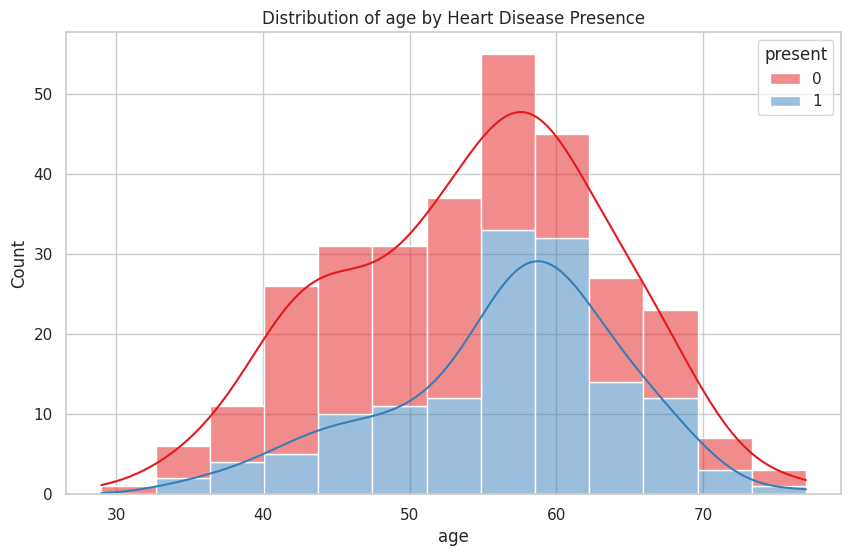

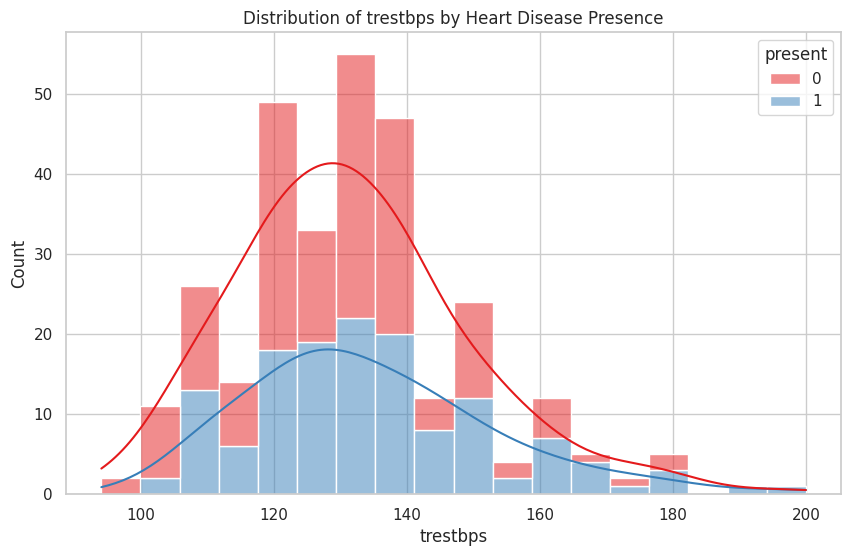

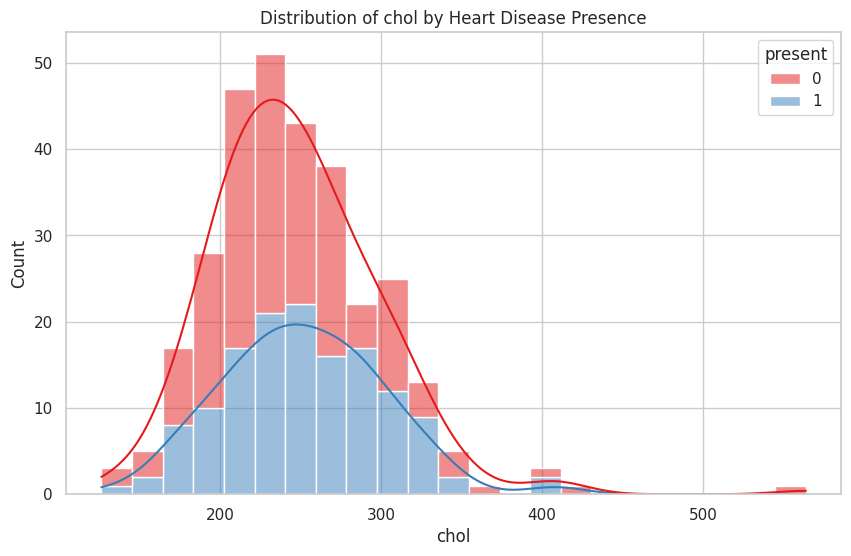

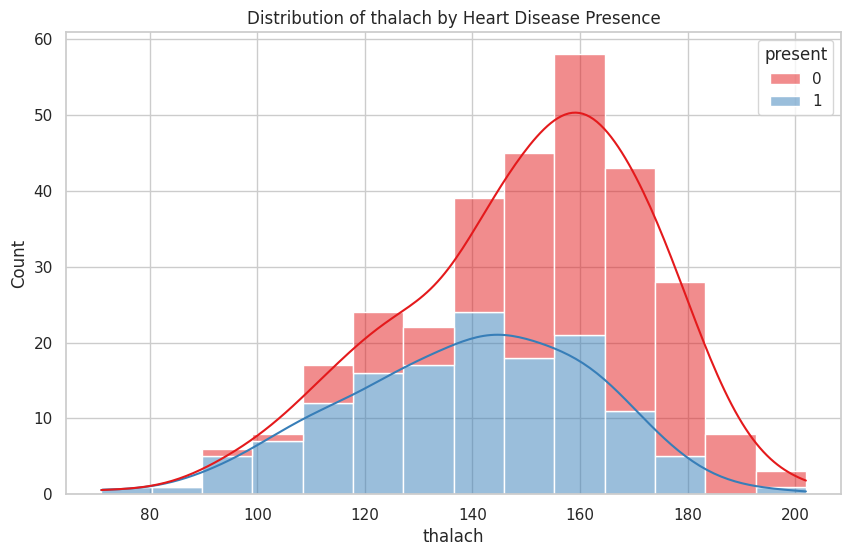

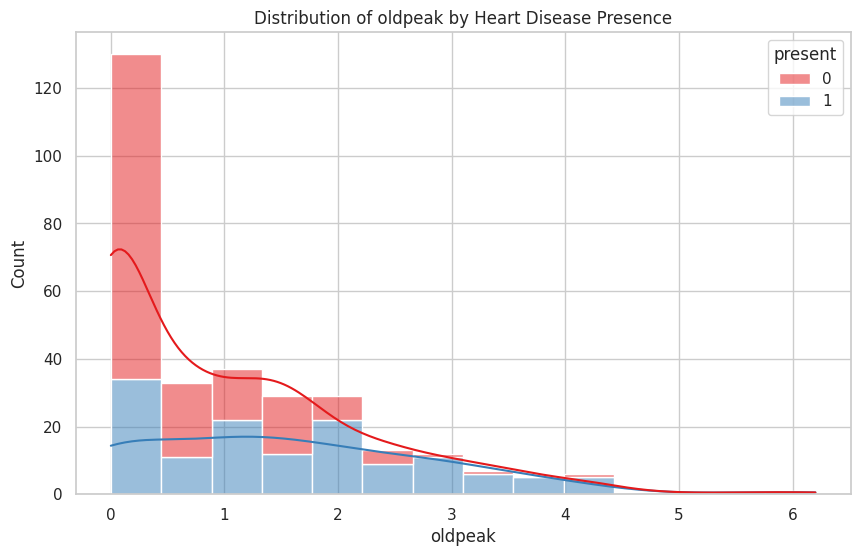

In [16]:
# Set the plotting style
sns.set(style="whitegrid")

# Define numerical columns (continuous variables suitable for histograms)
numeral_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Plot histograms for numerical variables
for col in numeral_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=heart, x=col, hue='present', multiple='stack', kde=True, palette='Set1')
    plt.title(f'Distribution of {col} by Heart Disease Presence')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

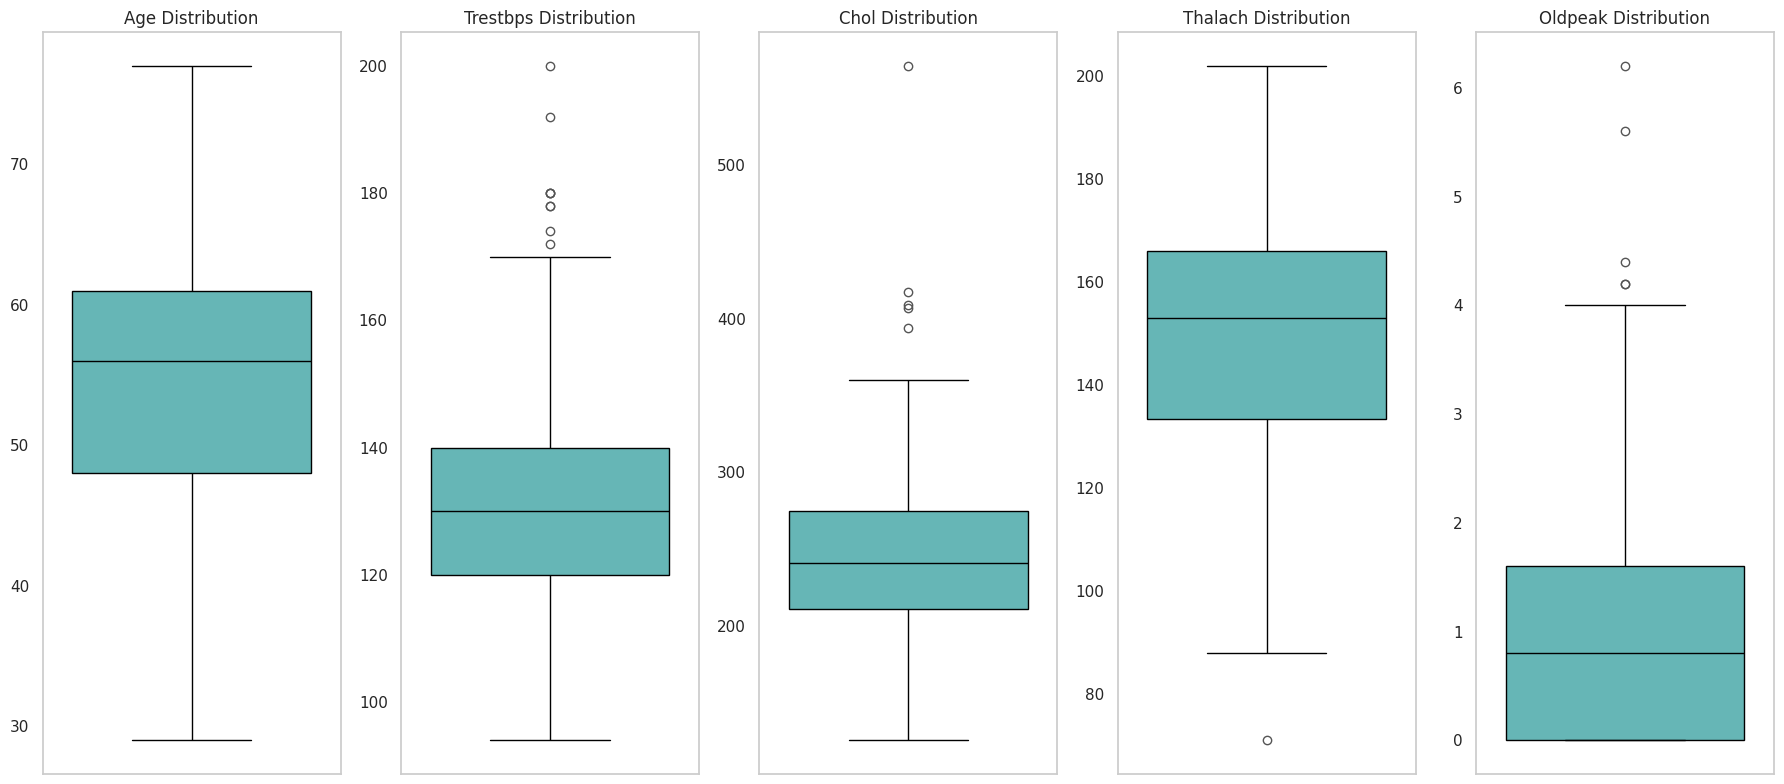

In [18]:
# List of numerical columns
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# Set up the subplots
fig, axes = plt.subplots(1, len(numerical_columns), figsize=(18, 8))

# Plot box plots for each numerical column
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    sns.boxplot(data=heart_disease_df, y=col, ax=ax, color='#59C3C3',
                boxprops=dict(edgecolor="black"),
                medianprops=dict(color="black"),
                whiskerprops=dict(color="black"),
                capprops=dict(color="black"))

    ax.set_title(f'{col.capitalize()} Distribution')
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.grid(False)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



* **Age:** There’s a clear shift toward older ages for present = 1, indicating age is a meaningful predictor. Patients with heart disease tend to be older, which aligns with medical expectations.

*  **Maximum Heart Rate Achieved (thalach):** There’s a meaningful difference, with lower maximum heart rates more common in heart disease cases. This suggests thalach is a strong predictor, likely due to reduced cardiovascular capacity in diseased patients.

* **ST Depression Induced by Exercise (oldpeak):** The higher median and wider IQR for present = 1 suggest greater ST depression is strongly associated with heart disease, making oldpeak a key predictor.
*  **Cholesterol (chol):** There’s a modest difference, with higher cholesterol levels appearing slightly more common in heart disease cases. However, the overlap is significant, suggesting chol may have limited discriminative power on its own. It’s still worth including after scaling.


*  **Resting Blood Pressure (trestbps):** The difference is minimal, with significant overlap. Resting blood pressure may not be a strong standalone predictor, but it could still contribute when combined with other features after scaling.


**Conclusion**:


*   Strong predictors: age, thalach, oldpeak

*   Moderate predictors: chol
*   Weak predictors: trestbps










##Categorical Variables Distribution

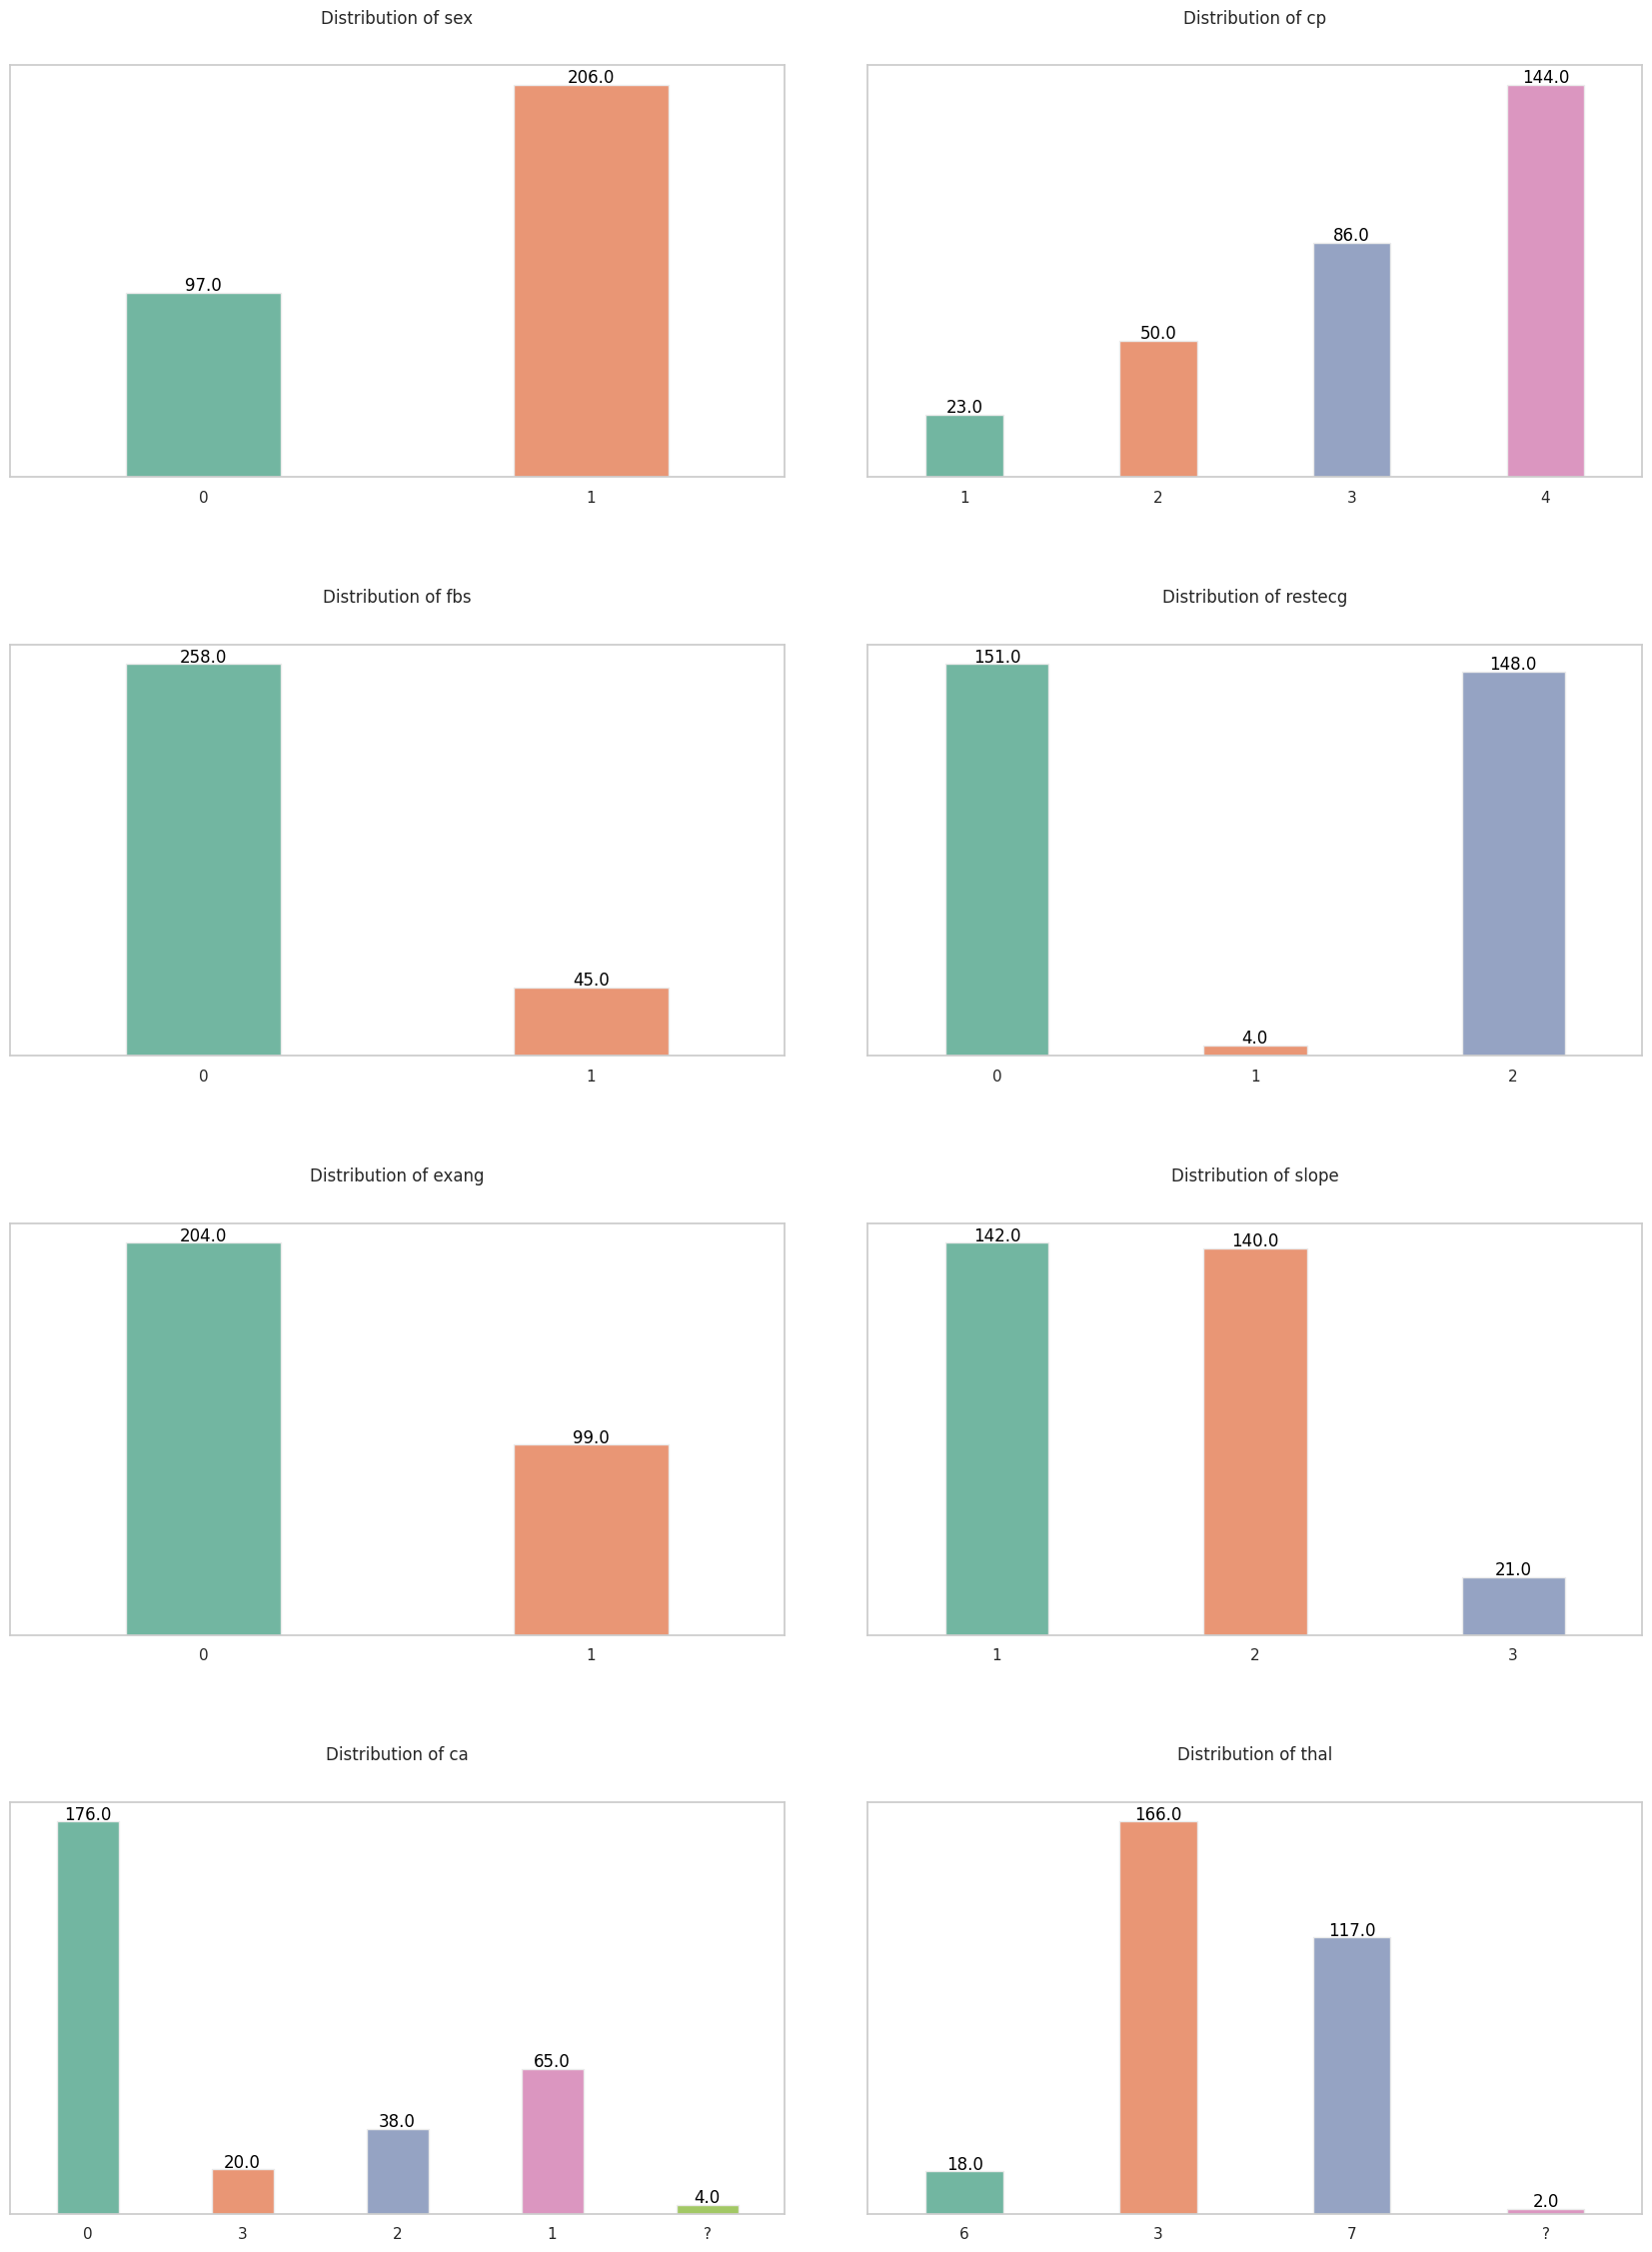

In [19]:
# List of categorical columns
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Set up the subplots (4 rows, 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(18, 24))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot bar charts for each categorical column
for i, col in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(
        data=heart_disease_df,
        x=col,
        ax=ax,
        palette="Set2",
        hue=col,
        legend=False,
        edgecolor="#EBEBEB",
        width=0.4
    )

    # Titles and labels
    ax.set_title(f'Distribution of {col}', pad=30)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticks([])

    # Add data labels on bars
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height()}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='center',
            fontsize=12,
            color='black',
            xytext=(0, 5),
            textcoords='offset points'
        )

# Remove any empty subplots if categorical_columns < total axes
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=5)
plt.show()



*   **sex:** The dataset contains more males (1) than females (0), with approximately twice as many males (206 vs. 97).

*   **cp (chest pain type):** The most common chest pain type is category 4, followed by 3 and 2, with category 1 being the least frequent.

*   **fbs (fasting blood sugar > 120 mg/dl):** Majority of patients (258) have fasting blood sugar below the threshold (0), while a smaller portion (45) have elevated levels (1).

*   **restecg (resting electrocardiographic results):** Categories 0 and 2 dominate almost equally, while category 1 is rare.
*   **exang (exercise induced angina):** More patients do not have exercise induced angina (0) compared to those who do (1).


*   **slope (ST segment slope):** Categories 1 and 2 appear with similar frequency, while category 3 is less common.


*   **ca (number of major vessels colored by fluoroscopy):** Most patients have 0 or 1 vessel involved, with fewer cases showing 2 or 3 vessels affected. There are some missing values indicated by '?'


*   **thal (thalassemia status):** Majority of values are 3 or 7, with fewer at 6. Missing values are present as '?'.



##Correlation Analysis

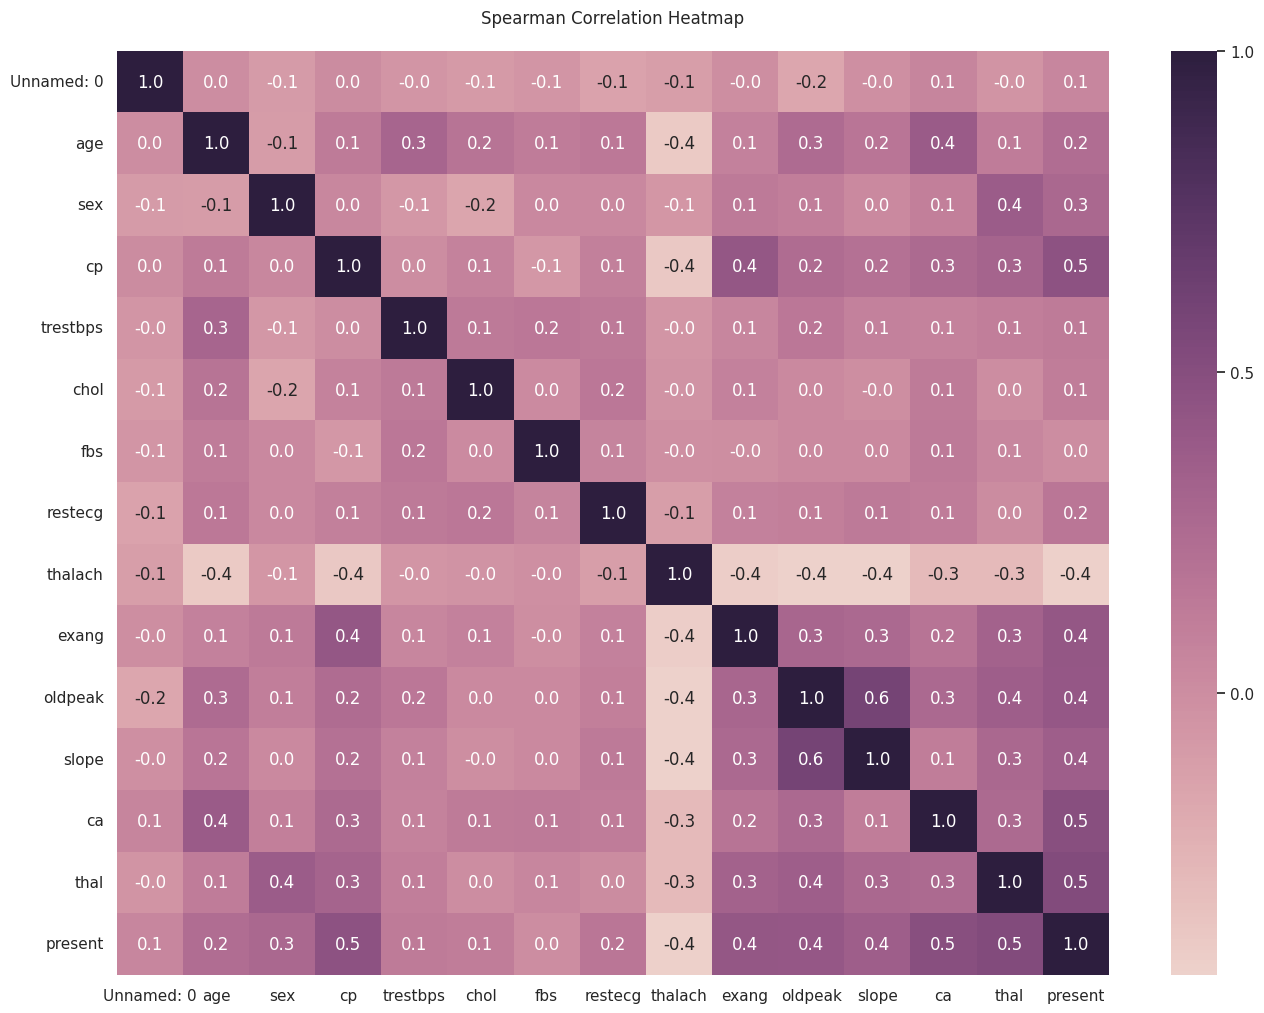

In [23]:
# Coerce to numeric, forcing errors to NaN (if any)
heart_disease_df["ca"] = pd.to_numeric(heart_disease_df["ca"], errors="coerce")
heart_disease_df["thal"] = pd.to_numeric(heart_disease_df["thal"], errors="coerce")

# Drop rows with NaNs in 'ca' or 'thal'
heart_disease_df = heart_disease_df.dropna(subset=["ca", "thal"]).copy()

# Convert to correct types after dropping
heart_disease_df["ca"] = heart_disease_df["ca"].astype("category")
heart_disease_df["thal"] = heart_disease_df["thal"].astype("category")

# Calculate Spearman correlation matrix
corr_matrix = heart_disease_df.corr(method='spearman')

# Set up figure
plt.figure(figsize=(16, 12))

# Create heatmap
ax = sns.heatmap(
    corr_matrix,
    cmap=sns.cubehelix_palette(as_cmap=True),
    annot=True,
    linewidths=0,
    linecolor="#EBEBEB",
    fmt=".1f",
    cbar_kws={"ticks": [-1, -0.5, 0, 0.5, 1]}
)

# Customize xticks
plt.xticks(rotation=0, ha='center')
plt.yticks(rotation=0, ha='right')

# Add title
plt.title("Spearman Correlation Heatmap", pad=20)

# Display plot
plt.show()




*   **Thal (0.52) and Ca (0.49)** show the strongest positive correlations, indicating that abnormalities in thalassemia and the number of major vessels colored by fluoroscopy are closely related to heart disease presence.

*   **Chest Pain Type (cp, 0.46)**, **Exercise Induced Angina (exang, 0.42)**, **Oldpeak (0.41)**, and **Slope of ST segment (slope, 0.36)** also have strong positive correlations, reflecting their importance in identifying heart disease risk.

*  **Maximum Heart Rate Achieved (thalach, -0.43)** has a strong negative correlation, meaning that lower maximum heart rate during exercise is associated with a higher likelihood of heart disease.
*   **Sex (0.28)** and **Age (0.24)** show moderate positive correlations, suggesting that males and older individuals are at somewhat increased risk.


*   Other features such as **Resting Blood Pressure** **(trestbps, 0.13)**, **Cholesterol (chol, 0.12)**, and **Resting ECG results (restecg, 0.17)** have weaker positive correlations.


*   **Fasting Blood Sugar (fbs, 0.003)** shows virtually no correlation with heart disease presence and is likely less informative.



###**Selected Features for Model Building**


*   thal

*   ca

*   cp

*   exang

*   oldpeak
*   slope


*   thalach


*   sex


*   age


These features capture key clinical indicators related to heart disease risk and should provide the model with meaningful information for accurate predictions. Features with very low correlation, such as **fbs**, were excluded to reduce noise and improve model performance.



##Data Cleaning and Preprocessing

The ca and thal columns contained non-numeric entries represented by "?", which indicated missing or invalid data.

To handle this:



1.   I converted both columns to numeric which replaced "?" values with NaN.

1.   I dropped the rows containing these NaN values since they represented only 6 out of 303 rows (less than 2% of the dataset).
2.   After cleaning, I converted the columns to the appropriate data type:

  * ca and thal were cast to category to reflect their categorical nature and prepare them for modeling



.






##One-Hot Encoding of Categorical Features

In [24]:
# List of categorical columns to one-hot encode
categorical_cols = ['thal', 'ca', 'cp', 'exang', 'slope', 'sex']

# One-hot encode categorical variables, drop first to avoid dummy variable trap
heart_disease_df_encoded = pd.get_dummies(heart_disease_df, columns=categorical_cols, drop_first=True)

# Display the first few rows to confirm
heart_disease_df_encoded.head()

,Unnamed: 0,age,trestbps,chol,fbs,restecg,thalach,oldpeak,present,thal_6.0,...,ca_1.0,ca_2.0,ca_3.0,cp_2,cp_3,cp_4,exang_1,slope_2,slope_3,sex_1
0,1,63,145,233,1,2,150,2.3,0,True,...,False,False,False,False,False,False,False,False,True,True
1,2,67,160,286,0,2,108,1.5,1,False,...,False,False,True,False,False,True,True,True,False,True
2,3,67,120,229,0,2,129,2.6,1,False,...,False,True,False,False,False,True,True,True,False,True
3,4,37,130,250,0,0,187,3.5,0,False,...,False,False,False,False,True,False,False,False,True,True
4,5,41,130,204,0,2,172,1.4,0,False,...,False,False,False,True,False,False,False,False,False,False


The categorical features **thal**, **ca**, **cp**, **exang**, **slope**, and **sex** were transformed using one-hot encoding. This process converts each category within these features into separate binary columns, representing the presence (1) or absence (0) of that category for each record.

To avoid redundancy and multicollinearity, the first category in each feature was dropped (drop_first=True). This ensures the encoded dataset is suitable for most machine learning models that require numerical input without introducing correlated variables.

This transformation allows the model to interpret categorical information effectively while preserving the distinct categories within each feature.

##Feature Scaling

To prepare the data for logistic regression, I applied feature scaling to the numerical variables. Scaling helps ensure that features contribute equally to the model, especially when using algorithms sensitive to the magnitude of feature values—like logistic regression, which relies on distance calculations during optimization.

I used standardization which transforms each numerical feature to have a mean of 0 and a standard deviation of 1. This was applied to the following numerical features:



*   age

*   thalach (maximum heart rate achieved)
*   oldpeak (ST depression induced by exercise)

The scaled numerical features are now on a comparable scale, improving the convergence and performance of the logistic regression model.




##**Building The Logistic Regression Model**

In [27]:
# Define target and features
X = heart_disease_df_encoded.drop(columns='present')
y = heart_disease_df_encoded['present']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Check class distribution in training and test sets
print("Training set class distribution:")
print(y_train.value_counts())

print("\nTest set class distribution:")
print(y_test.value_counts())

Training set class distribution:
present
0    112
1     95
Name: count, dtype: int64

Test set class distribution:
present
0    48
1    42
Name: count, dtype: int64


I used 30% of the data for testing and 70% for training. Here's the distribution of the target variable (present):



*   **Training set:** 112 no-disease (0), 93 disease (1)
*   **Test set:** 48 no-disease (0), 41 disease (1)


Both sets are fairly balanced, which supports reliable model evaluation.

In [29]:
# Instantiate the model
model = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model on the training set
model.fit(X_train, y_train)

# Make predictions on the train set
y_pred_train = model.predict(X_train)

# Calculate train accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)

# Calculate train confusion matrix
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Sensitivity (Recall for class 1)
sensitivity_train = recall_score(y_train, y_pred_train, pos_label=1)

# Specificity (Recall for class 0)
specificity_train = recall_score(y_train, y_pred_train, pos_label=0)

# Display results
print(f"Train Accuracy: {accuracy_train:.3f}")
print(f"Train Sensitivity (Recall for class 1): {sensitivity_train:.3f}")
print(f"Train Specificity (Recall for class 0): {specificity_train:.3f}")

Train Accuracy: 0.860
Train Sensitivity (Recall for class 1): 0.811
Train Specificity (Recall for class 0): 0.902


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###Model Performance on Training Set

The logistic regression model performed well on the training data:

*   **Accuracy:** 86%

*   **Sensitivity (Recall for class 1):** 81%
*   **Specificity (Recall for class 0):** 90%



These results suggest the model is able to correctly identify both disease and no-disease cases with good precision, and it's not overfitting to either class.


###Interpreting The Model Coefficients

In [31]:
# Get feature names
feature_names = X_train.columns

# Get model coefficients (log-odds scale)
log_odds = model.coef_.flatten()

# Convert to odds scale
odds = np.exp(log_odds)

# Combine into a DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Log-Odds Coefficient': log_odds,
    'Odds Ratio': odds
}).sort_values(by='Odds Ratio', ascending=False)

# Display the result
display(coef_df)

,Feature,Log-Odds Coefficient,Odds Ratio
11,ca_2.0,1.454351,4.281702
9,thal_7.0,1.453085,4.276287
10,ca_1.0,1.327893,3.773086
15,cp_4,1.140858,3.129451
19,sex_1,0.887885,2.429985
17,slope_2,0.559269,1.749393
16,exang_1,0.469479,1.599160
7,oldpeak,0.368552,1.445640
18,slope_3,0.362510,1.436932
12,ca_3.0,0.330195,1.391239


The logistic regression coefficients reveal the impact of each feature on the likelihood of heart disease:

*   Features with positive coefficients increase the odds of heart disease. For example, **ca_2.0	 (odds ratio ~4.28)** and **thal_7.0 (odds ratio ~4.27)** strongly increase risk.

*  The **sex_1** coefficient indicates that being male triples the odds (odds ratio ~2.42).
*   Variables like **oldpeak**, **exang_1**, and some slope categories moderately increase risk **(odds ratios around 1.4 to 1.6)**.


*   Negative coefficients reduce the odds, such as **thalach (odds ratio ~0.97)** and age slightly lowering risk in this model.


*   Some chest pain types **(cp_3)** slightly lower the odds.

Overall, these coefficients highlight the most influential predictors, helping to interpret which factors contribute most to heart disease risk in the model.

#**Final Model Evaluation**

In [32]:
# Predict on the test set
y_pred_test = model.predict(X_test)

# Accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)

# Confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Sensitivity (Recall for class 1)
sensitivity_test = recall_score(y_test, y_pred_test, pos_label=1)

# Specificity (Recall for class 0)
specificity_test = recall_score(y_test, y_pred_test, pos_label=0)

# Display test evaluation metrics
print(f"Test Accuracy: {accuracy_test:.3f}")
print(f"Test Sensitivity (Recall for class 1): {sensitivity_test:.3f}")
print(f"Test Specificity (Recall for class 0): {specificity_test:.3f}")


Test Accuracy: 0.833
Test Sensitivity (Recall for class 1): 0.762
Test Specificity (Recall for class 0): 0.896


###**Model Performance on the Test Set**

Model Performance on the Test Set
The model shows good overall accuracy of 83.33%, indicating reliable predictions on unseen data.

*   Sensitivity of 76.2% means the model correctly identifies nearly over three-quarters of actual heart disease cases.
*   Specificity of 89.6% shows strong ability to correctly recognize those without the disease.



###**Model Interpretation and Performance Evaluation**

**Does the model make sense based on its interpretation?**

Yes, the model’s coefficients generally align with medical knowledge. Features like thal, ca, cp, and exang show strong positive associations with heart disease presence, which matches clinical expectations. Protective factors such as higher thalach (maximum heart rate) have negative coefficients, indicating lower risk, which also fits well.

**Does the model predict cases or non-cases better?**

The model predicts non-cases (absence of disease) slightly better, as reflected by higher specificity compared to sensitivity on both train and test sets.

**How should we interpret the model’s accuracy? Is it acceptable for clinical use?**

An accuracy around 83% is promising but not definitive for clinical deployment. While it indicates the model is generally reliable, clinical settings usually require higher precision and balanced sensitivity/specificity to avoid missed diagnoses or false alarms. This model could serve as a useful screening tool but would need further validation and possibly integration with other diagnostic methods before clinical use.

###**Conclusion**

This project set out to predict the presence of heart disease using a logistic regression model based on clinical and demographic features. The process included careful data preprocessing, feature selection guided by correlation analysis, and model evaluation using relevant performance metrics.

The model identified important predictors such as thalassemia, number of major vessels, and chest pain type, and achieved solid accuracy and balanced sensitivity and specificity on both training and test data. These results suggest the model can be a useful tool for preliminary risk assessment, though further validation would be needed for clinical deployment.